https://klyshko.github.io/teaching/2019-02-22-teaching
https://pages.mtu.edu/~suits/notefreqs.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
%matplotlib inline

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9, 7)

In [57]:
def plt_signal_sample(file):
    sampFreq, sound = wavfile.read('audio/samples/' + file)
    plt.subplot(2,1,1)
    plt.plot(sound[:,0], 'r')
    plt.xlabel("left channel, sample #")
    plt.subplot(2,1,2)
    plt.plot(sound[:,1], 'b')
    plt.xlabel("right channel, sample #")
    plt.tight_layout()
    plt.show()

In [59]:
def plt_signal_time(file):
    sampFreq, sound = wavfile.read('audio/samples/' + file)
    s = sound.shape[0] / sampFreq
    time = np.arange(sound.shape[0]) / sound.shape[0] * s
    plt.subplot(2,1,1)
    plt.plot(time, sound[:,0], 'r')
    plt.xlabel("time (left)")
    plt.ylabel("signal, relative units")
    plt.subplot(2,1,2)
    plt.plot(time, sound[:,1], 'b')
    plt.xlabel("time (right)")
    plt.ylabel("signal, relative units")
    plt.tight_layout()
    plt.show()

In [84]:
def plt_amplitude_frequency(file):
    sampFreq, sound = wavfile.read('audio/samples/' + file)
    s = sound.shape[0] / sampFreq
    time = np.arange(sound.shape[0]) / sound.shape[0] * s
    signal = sound[:,0]
    fft_spectrum = np.abs(np.fft.rfft(signal))
    freq = np.fft.rfftfreq(signal.size, d=1./sampFreq)
    plt.plot(freq, fft_spectrum)
    plt.xlabel("frequency, Hz")
    plt.ylabel("Amplitude, units")
    plt.show()

<ipython-input-57-829bc73cffaa>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampFreq, sound = wavfile.read('audio/samples/' + file)


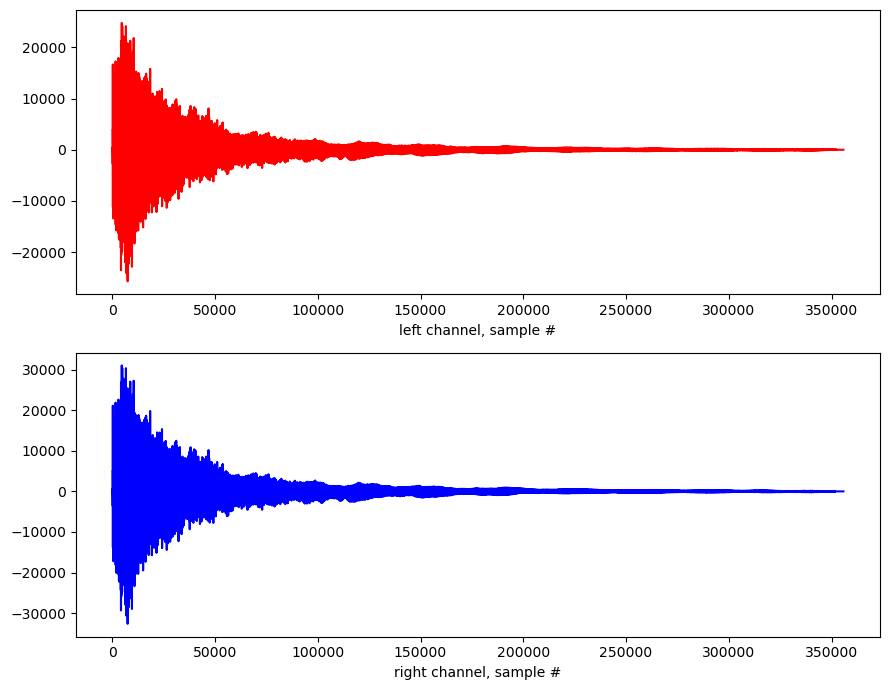

In [85]:
plt_signal_sample('Amaj.wav')

<ipython-input-59-f928da96f404>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampFreq, sound = wavfile.read('audio/samples/' + file)


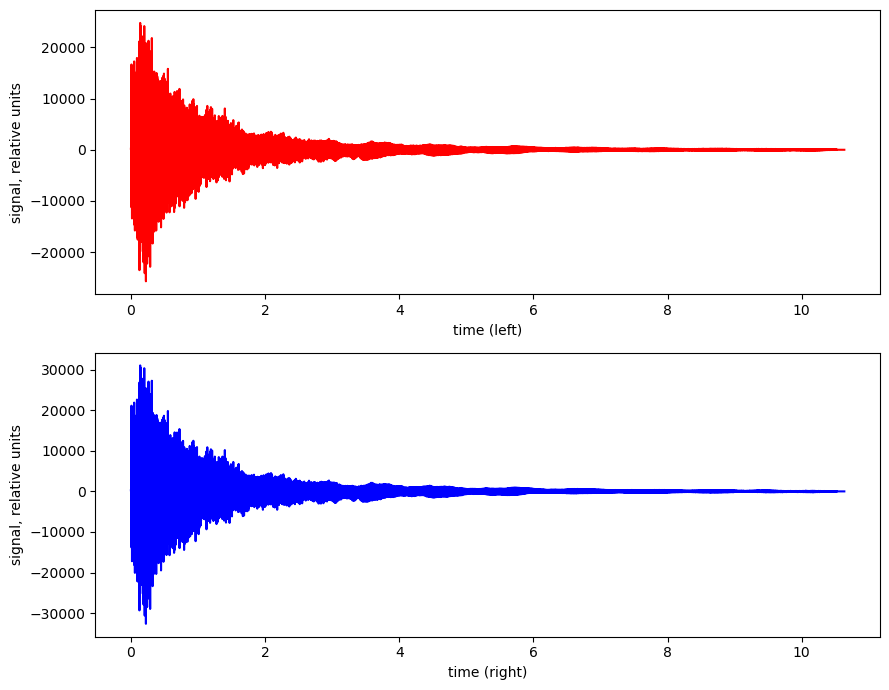

In [86]:
plt_signal_time('Amaj.wav')

<ipython-input-84-902b01f6124e>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampFreq, sound = wavfile.read('audio/samples/' + file)


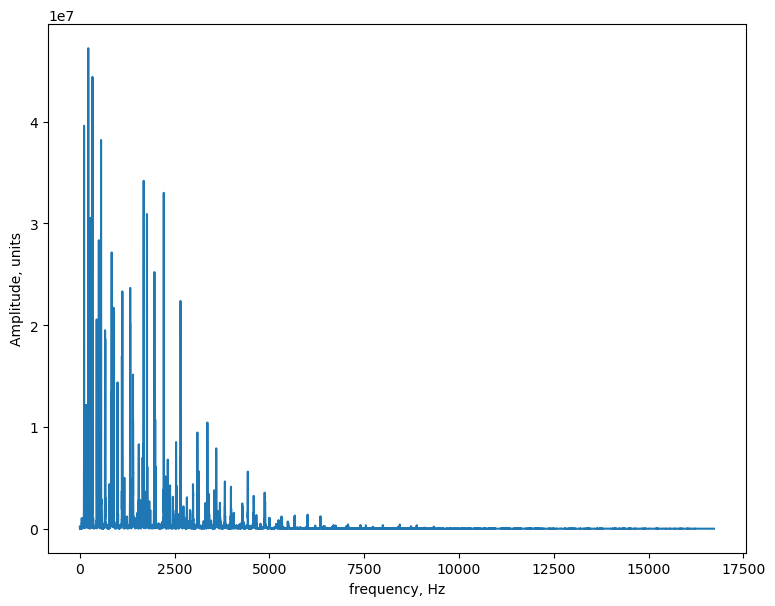

In [87]:
plt_amplitude_frequency('Amaj.wav')

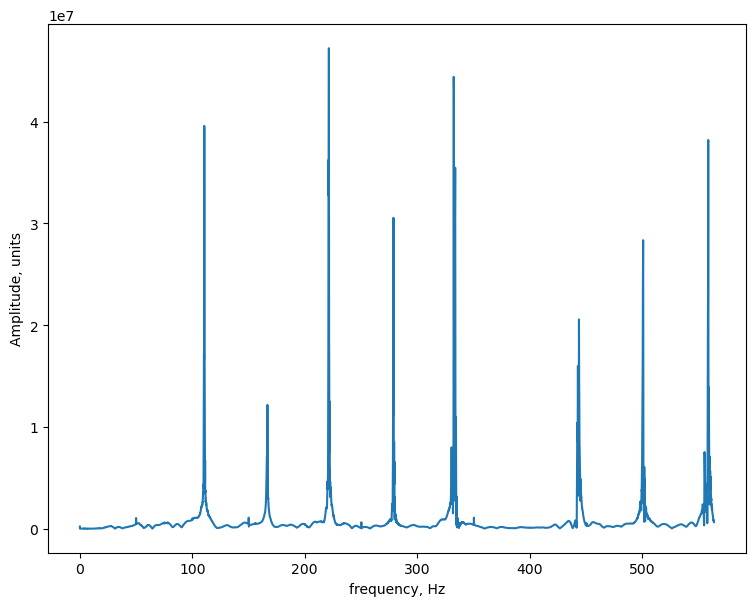

In [90]:
plt.plot(freq[:6000], fft_spectrum_abs[:6000])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

In [93]:
for i,f in enumerate(fft_spectrum_abs):
    if f > 25000000: #looking at amplitudes of the spikes higher than 1 
        print('frequency = {} Hz with amplitude {} '.format(np.round(freq[i],1),  np.round(f)))

frequency = 110.6 Hz with amplitude 25842362.0 
frequency = 110.7 Hz with amplitude 39584552.0 
frequency = 110.8 Hz with amplitude 39296585.0 
frequency = 221.1 Hz with amplitude 31513366.0 
frequency = 221.2 Hz with amplitude 36240650.0 
frequency = 221.3 Hz with amplitude 32730909.0 
frequency = 221.4 Hz with amplitude 38538398.0 
frequency = 221.5 Hz with amplitude 47213689.0 
frequency = 279.0 Hz with amplitude 30549086.0 
frequency = 279.1 Hz with amplitude 25729920.0 
frequency = 332.5 Hz with amplitude 26905428.0 
frequency = 332.6 Hz with amplitude 44400717.0 
frequency = 332.7 Hz with amplitude 43301118.0 
frequency = 333.6 Hz with amplitude 31042181.0 
frequency = 333.7 Hz with amplitude 30835880.0 
frequency = 333.8 Hz with amplitude 35178395.0 
frequency = 333.9 Hz with amplitude 35477787.0 
frequency = 501.0 Hz with amplitude 25920299.0 
frequency = 501.1 Hz with amplitude 28350146.0 
frequency = 558.9 Hz with amplitude 33302308.0 
frequency = 559.0 Hz with amplitude 3819

In [97]:
note_freq_dict = {
    'A3': 220.00,
    'A#3': 233.08,
    'B3': 246.94,
    'C4': 261.63,
    'C#4': 277.18,
    'D4': 293.66,
    'D#4': 311.13,
    'E4': 329.63,
    'F4': 349.23,
    'F#4': 369.99,
    'G4': 392.00,
    'G#4': 415.30
}

In [101]:
res_key= min(note_freq_dict.items(), key=lambda x: abs(220 - x[1]))[0]
res_key

'A3'

In [105]:
notes=set()
for i,f in enumerate(fft_spectrum_abs):
    if f > 25000000: #looking at amplitudes of the spikes higher than 1 
        print('frequency = {} Hz with amplitude {} '.format(np.round(freq[i],1),  np.round(f)))
        notes.add(min(note_freq_dict.items(), key=lambda x: abs(np.round(freq[i], 1) - x[1]))[0])
print(notes)

frequency = 110.6 Hz with amplitude 25842362.0 
frequency = 110.7 Hz with amplitude 39584552.0 
frequency = 110.8 Hz with amplitude 39296585.0 
frequency = 221.1 Hz with amplitude 31513366.0 
frequency = 221.2 Hz with amplitude 36240650.0 
frequency = 221.3 Hz with amplitude 32730909.0 
frequency = 221.4 Hz with amplitude 38538398.0 
frequency = 221.5 Hz with amplitude 47213689.0 
frequency = 279.0 Hz with amplitude 30549086.0 
frequency = 279.1 Hz with amplitude 25729920.0 
frequency = 332.5 Hz with amplitude 26905428.0 
frequency = 332.6 Hz with amplitude 44400717.0 
frequency = 332.7 Hz with amplitude 43301118.0 
frequency = 333.6 Hz with amplitude 31042181.0 
frequency = 333.7 Hz with amplitude 30835880.0 
frequency = 333.8 Hz with amplitude 35178395.0 
frequency = 333.9 Hz with amplitude 35477787.0 
frequency = 501.0 Hz with amplitude 25920299.0 
frequency = 501.1 Hz with amplitude 28350146.0 
frequency = 558.9 Hz with amplitude 33302308.0 
frequency = 559.0 Hz with amplitude 3819